In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset


In [5]:
from load_datasets import load_mnist

train_dataset, test_dataset = load_mnist()

In [6]:
# Convert training data to numpy arrays
X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
y_train = train_dataset.targets.numpy()

# Convert test data to numpy arrays
X_test = test_dataset.data.numpy().reshape(len(test_dataset), -1)
y_test = test_dataset.targets.numpy()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print(f'Random Forest accuracy: {np.mean(y_rf_pred == y_test)}')

Random Forest accuracy: 0.9705


In [9]:
# rf_model save
import joblib
joblib.dump(rf_model, './models/rf_model.pkl')

['./models/rf_model.pkl']

In [10]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train_scaled, y_train)
y_lr_pred = lr_model.predict(X_test_scaled)

print(f'Logistic Regression accuracy: {np.mean(y_lr_pred == y_test)}')

Logistic Regression accuracy: 0.9221


In [11]:
# lr_model save
joblib.dump(lr_model, './models/lr_model.pkl')

['./models/lr_model.pkl']

In [12]:
# F1 score and confusion matrix for Random Forest
f1_rf = f1_score(y_test, y_rf_pred, average='macro')

# F1 score and confusion matrix for Logistic Regression
f1_lr = f1_score(y_test, y_lr_pred, average='macro')

# Print F1 scores
print(f'Random Forest F1 Score: {f1_rf:.4f}')
print(f'Logistic Regression F1 Score: {f1_lr:.4f}')


Random Forest F1 Score: 0.9702
Logistic Regression F1 Score: 0.9211


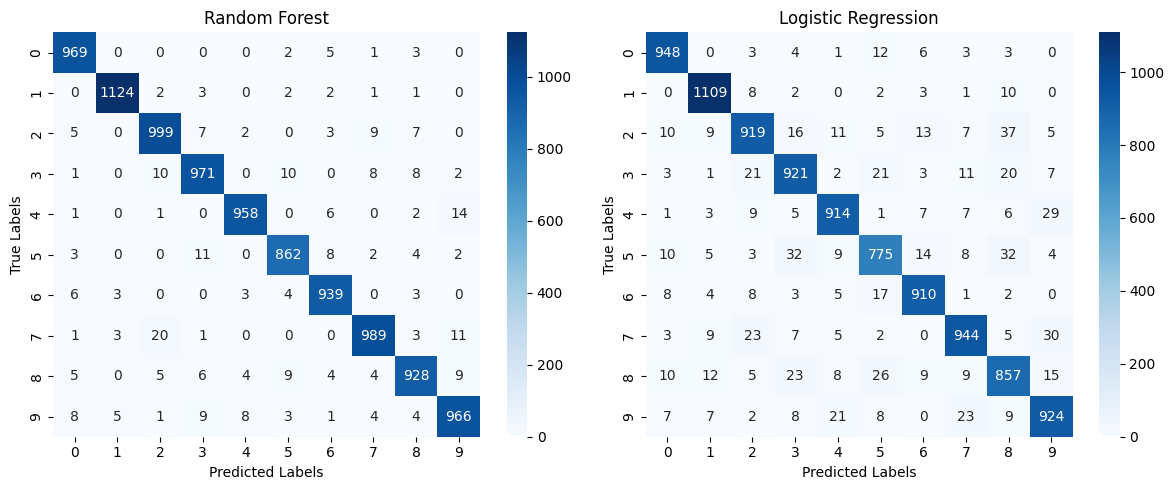

In [13]:
cm_rf = confusion_matrix(y_test, y_rf_pred)
cm_lr = confusion_matrix(y_test, y_lr_pred)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Random Forest')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Logistic Regression')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [15]:
# classification reports
print('Random Forest Classification Report')
print(classification_report(y_test, y_rf_pred))
print("-"*50)
print('\nLogistic Regression Classification Report')
print(classification_report(y_test, y_lr_pred))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

--------------------------------------------------

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
  